# <b><span style='color:#F1A424'>AutoML - Multiclass Classification - Glass Type Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used : Glass Type Dataset**

**Features**:
- `Id number`: 1 to 214 (removed from CSV file)
- `RI`: refractive index
- `Na`: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- `Mg`: Magnesium
- `Al`: Aluminum
- `Si`: Silicon
- `K`: Potassium
- `Ca`: Calcium
- `Ba`: Barium
- `Fe`: Iron

**Target Variable**:
- `Type of glass`: (class attribute)
  - 1 building_windows_float_processed
  - 2 building_windows_non_float_processed
  - 3 vehicle_windows_float_processed
  - 4 vehicle_windows_non_float_processed (none in this database)
  - 5 containers
  - 6 tableware
  - 7 headlamps

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the type of glass.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.


In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','glass_types')

In [5]:
# Fetching in teradata dataframe
glass_df = DataFrame("glass_types")

In [6]:
# first 5 rows
glass_df.head()

ri,na,mg,ai,si,k,ca,ba,fe,gtype
1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.0,0.31,1
1.51316,13.02,0.0,3.04,70.48,6.21,6.96,0.0,0.0,5
1.51321,13.0,0.0,3.02,70.7,6.21,6.93,0.0,0.0,5
1.51409,14.25,3.09,2.08,72.28,1.1,7.08,0.0,0.0,2
1.51514,14.01,2.68,3.5,69.89,1.68,5.87,2.2,0.0,5
1.51514,14.85,0.0,2.42,73.72,0.0,8.39,0.56,0.0,7
1.51508,15.15,0.0,2.25,73.5,0.0,8.34,0.63,0.0,7
1.51299,14.4,1.74,1.54,74.55,0.0,7.59,0.0,0.0,6
1.51131,13.69,3.2,1.81,72.81,1.76,5.43,1.19,0.0,7
1.51115,17.38,0.0,0.34,75.41,0.0,6.65,0.0,0.0,6


In [7]:
# glass_df dataset
glass_df.shape

(214, 10)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
glass_df_sample = glass_df.sample(frac = [0.8, 0.2])

In [9]:
glass_df_sample.head()

ri,na,mg,ai,si,k,ca,ba,fe,gtype,sampleid
1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.0,0.31,1,1
1.51316,13.02,0.0,3.04,70.48,6.21,6.96,0.0,0.0,5,1
1.51321,13.0,0.0,3.02,70.7,6.21,6.93,0.0,0.0,5,1
1.51409,14.25,3.09,2.08,72.28,1.1,7.08,0.0,0.0,2,1
1.51514,14.01,2.68,3.5,69.89,1.68,5.87,2.2,0.0,5,1
1.51514,14.85,0.0,2.42,73.72,0.0,8.39,0.56,0.0,7,1
1.51508,15.15,0.0,2.25,73.5,0.0,8.34,0.63,0.0,7,1
1.51299,14.4,1.74,1.54,74.55,0.0,7.59,0.0,0.0,6,2
1.51131,13.69,3.2,1.81,72.81,1.76,5.43,1.19,0.0,7,1
1.51115,17.38,0.0,0.34,75.41,0.0,6.65,0.0,0.0,6,1


In [10]:
# Fetching train and test data
glass_df_train= glass_df_sample[glass_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
glass_df_test = glass_df_sample[glass_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
glass_df_train.shape

(171, 10)

In [12]:
# test data shape
glass_df_test.shape

(43, 10)

In [13]:
#train dataset
glass_df_train.head()

ri,na,mg,ai,si,k,ca,ba,fe,gtype
1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.0,0.31,1
1.51321,13.0,0.0,3.02,70.7,6.21,6.93,0.0,0.0,5
1.51409,14.25,3.09,2.08,72.28,1.1,7.08,0.0,0.0,2
1.51508,15.15,0.0,2.25,73.5,0.0,8.34,0.63,0.0,7
1.51514,14.01,2.68,3.5,69.89,1.68,5.87,2.2,0.0,5
1.51556,13.87,0.0,2.54,73.23,0.14,9.41,0.81,0.01,7
1.51514,14.85,0.0,2.42,73.72,0.0,8.39,0.56,0.0,7
1.51316,13.02,0.0,3.04,70.48,6.21,6.96,0.0,0.0,5
1.51131,13.69,3.2,1.81,72.81,1.76,5.43,1.19,0.0,7
1.51115,17.38,0.0,0.34,75.41,0.0,6.65,0.0,0.0,6


In [14]:
# test dataset
glass_df_test.head()

ri,na,mg,ai,si,k,ca,ba,fe,gtype
1.51545,14.14,0.0,2.68,73.39,0.08,9.07,0.61,0.05,7
1.5159,13.02,3.58,1.51,73.12,0.69,7.96,0.0,0.0,2
1.51602,14.85,0.0,2.38,73.28,0.0,8.76,0.64,0.09,7
1.5161,13.42,3.4,1.22,72.69,0.59,8.32,0.0,0.0,3
1.5164,12.55,3.48,1.87,73.23,0.63,8.08,0.0,0.09,2
1.51651,14.38,0.0,1.94,73.61,0.0,8.48,1.57,0.0,7
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
1.51571,12.72,3.46,1.56,73.2,0.67,8.09,0.0,0.24,1
1.51531,14.38,0.0,2.66,73.1,0.04,9.08,0.64,0.0,7
1.51299,14.4,1.74,1.54,74.55,0.0,7.59,0.0,0.0,6


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoML instance with task type 'Classification'
# Using only 'decision_forest' and 'xgboost' models from model training.
# Keeping early stopping metrics threshold to 0.6 for 'MICRO-F1', early stopping timer threshold to 80 sec
# and verbose level 2 for detailed loggging

aml = AutoML(task_type="Classification",
             include=['decision_forest', 'xgboost'],
             stopping_metric='MICRO-F1',
             stopping_tolerance=0.60,
             max_runtime_secs=80,
             verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 171
Total Columns in the data: 10

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
mg,FLOAT,171,0,None,35,136,0,0.0,100.0
fe,FLOAT,171,0,None,115,56,0,0.0,100.0
ai,FLOAT,171,0,None,0,171,0,0.0,100.0
ri,FLOAT,171,0,None,0,171,0,0.0,100.0
si,FLOAT,171,0,None,0,171,0,0.0,100.0
ba,FLOAT,171,0,None,143,28,0,0.0,100.0
ca,FLOAT,171,0,None,0,171,0,0.0,100.0
k,FLOAT,171,0,None,25,146,0,0.0,100.0
na,FLOAT,171,0,None,0,171,0,0.0,100.0
gtype,INTEGER,171,0,None,0,171,0,0.0,100.0


            ri       na       mg       ai       si        k       ca       ba       fe    gtype
func                                                                                           
min      1.511   10.730    0.000    0.340   69.810    0.000    5.430    0.000    0.000    1.000
std      0.003    0.824    1.455    0.504    0.784    0.711    1.472    0.467    0.099    2.062
25%      1.516   12.915    2.140    1.185   72.270    0.125    8.270    0.000    0.000    1.000
50%      1.518   13.240    3.480    1.400   72.810    0.550    8.600    0.000    0.000    2.000
75%      1.519   13.785    3.605    1.630   73.075    0.610    9.405    0.000    0.100    3.000
max      1.534   17.380    4.490    3.500   75.410    6.210   16.190    3.150    0.510    7.000
mean     1.518   13.362    2.667    1.449   72.642    0.510    9.023    0.157    0.057    2.784
count  171.000  171.000  171.000  171.000  171.000  171.000  171.000  171.000  171.000  171.000

Statistics of Data:


func,ri,na,mg,ai,si,k,ca,ba,fe,gtype
min,1.511,10.73,0,0.34,69.81,0,5.43,0,0,1
std,0.003,0.824,1.455,0.504,0.784,0.711,1.472,0.467,0.099,2.062
25%,1.516,12.915,2.14,1.185,72.27,0.125,8.27,0,0,1
50%,1.518,13.24,3.48,1.4,72.81,0.55,8.6,0,0,2
75%,1.519,13.785,3.605,1.63,73.075,0.61,9.405,0,0.1,3
max,1.534,17.38,4.49,3.5,75.41,6.21,16.19,3.15,0.51,7
mean,1.518,13.362,2.667,1.449,72.642,0.51,9.023,0.157,0.057,2.784
count,171,171,171,171,171,171,171,171,171,171



Target Column Distribution:


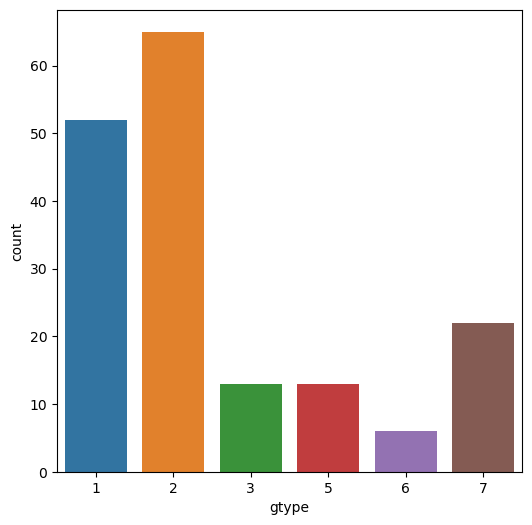

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0         ba          16.374269
1         na           4.678363
2          k           2.923977
3         fe           5.847953
4         ri           7.602339
5         ai           7.017544
6         ca           9.941520
7         si           5.847953
8      gtype          12.865497


Analysis completed. No action taken.                                                    


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


Analysis completed. No categorical columns were found.                                   


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0          k           2.923977
1         ri           7.602339
2         ai           7.017544
3         ca           9.941520
4         ba          16.374269
5         si           5.847953
6         fe           5.847953
7         na           4.678363
8      gtype          12.865497


['na', 'si', 'ai', 'ri', 'k', 'fe']


ri,na,mg,ai,si,k,ca,ba,fe,gtype,id
1.5169,13.33,3.54,1.61,72.54,0.68,8.11,0.0,0.0,2,13
1.51784,13.08,3.49,1.28,72.86,0.6,8.49,0.0,0.0,1,20
1.51784,12.68,3.67,1.16,73.11,0.61,8.7,0.0,0.0,1,12
1.52177,13.2,3.68,1.15,72.75,0.54,8.52,0.0,0.0,2,10
1.51709,13.0,3.47,1.79,72.72,0.66,8.18,0.0,0.0,2,11
1.52227,14.17,3.81,0.78,71.35,0.0,9.69,0.0,0.0,1,27
1.51841,13.02,3.62,1.06,72.34,0.64,9.13,0.0,0.15,2,9
1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.0,0.22,2,17
1.51674,12.79,3.52,1.54,73.36,0.66,7.9,0.0,0.0,2,23
1.51674,12.87,3.56,1.64,73.14,0.65,7.99,0.0,0.0,2,15


['ca', 'ba']


ri,na,mg,ai,si,k,ca,ba,fe,gtype,id
1.51709,13.0,3.47,1.79,72.72,0.66,8.18,0.0,0.0,2,11
1.51694,12.86,3.58,1.31,72.61,0.61,8.79,0.0,0.0,3,8
1.51905,13.6,3.62,1.11,72.64,0.14,8.76,0.0,0.0,1,16
1.51784,12.68,3.67,1.16,73.11,0.61,8.7,0.0,0.0,1,12
1.51674,12.87,3.56,1.64,73.14,0.65,7.99,0.0,0.0,2,15
1.51674,12.79,3.52,1.54,73.36,0.66,7.9,0.0,0.0,2,23
1.5169,13.33,3.54,1.61,72.54,0.68,8.11,0.0,0.0,2,13
1.51743,12.2,3.25,1.16,73.55,0.62,8.9,0.0,0.24,2,21
1.51841,13.02,3.62,1.06,72.34,0.64,9.13,0.0,0.15,2,9
1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.0,0.22,2,17


['si', 'mg', 'ri', 'k', 'fe', 'ca', 'na', 'ai']


['si', 'mg', 'ri', 'k', 'fe', 'ca', 'na', 'ai']


id,gtype,si,mg,ri,k,fe,ca,na,ai
2,2,0.5533596837944684,0.8040089086859687,0.28571428571427526,0.5090909090909091,0.0,0.4919093851132685,0.27956989247311814,0.42613636363636365
4,2,0.6007905138339958,0.7839643652561247,0.19780219780219807,0.6181818181818182,0.36,0.3139158576051782,0.3333333333333333,0.5909090909090909
5,1,0.8063241106719389,0.7728285077951003,0.37362637362637685,0.5454545454545454,0.24,0.47572815533980606,0.14695340501792123,0.49431818181818177
6,7,0.8181818181818208,0.0,0.72527472527471,0.0,0.0,0.4401294498381875,0.7885304659498208,0.8579545454545454
8,1,0.25296442687747045,0.8396436525612472,0.8901098901098791,0.11818181818181818,0.0,0.9514563106796116,0.37634408602150576,0.15909090909090912
9,2,0.36758893280632665,0.8329621380846325,0.4725274725274637,0.5818181818181818,0.88,0.608414239482201,0.2759856630824372,0.34090909090909094
7,1,0.632411067193679,0.7750556792873051,0.4505494505494444,0.5454545454545454,0.0,0.43689320388349506,0.254480286738351,0.4431818181818182
3,2,0.6363636363636358,0.7884187082405345,0.2747252747252656,0.5818181818181818,0.84,0.30744336569579267,0.2759856630824372,0.6306818181818182
1,1,0.7628458498023739,0.7639198218262806,0.19780219780219807,0.6272727272727272,0.96,0.3139158576051782,0.2580645161290326,0.5056818181818181
0,7,0.4071146245059291,0.7438752783964364,1.0,0.5454545454545454,0.0,0.5663430420711975,0.45878136200716835,0.40909090909090906


['ri', 'na', 'mg', 'si', 'k']


['r_ri', 'r_na', 'r_mg', 'r_si', 'r_k']


id,gtype,r_ri,r_na,r_mg,r_si,r_k
2,2,0.28571428571427526,0.27956989247311814,0.8040089086859687,0.5533596837944684,0.5090909090909091
4,2,0.19780219780219807,0.3333333333333333,0.7839643652561247,0.6007905138339958,0.6181818181818182
5,1,0.37362637362637685,0.14695340501792123,0.7728285077951003,0.8063241106719389,0.5454545454545454
6,7,0.72527472527471,0.7885304659498208,0.0,0.8181818181818208,0.0
8,1,0.8901098901098791,0.37634408602150576,0.8396436525612472,0.25296442687747045,0.11818181818181818
9,2,0.4725274725274637,0.2759856630824372,0.8329621380846325,0.36758893280632665,0.5818181818181818
7,1,0.4505494505494444,0.254480286738351,0.7750556792873051,0.632411067193679,0.5454545454545454
3,2,0.2747252747252656,0.2759856630824372,0.7884187082405345,0.6363636363636358,0.5818181818181818
1,1,0.19780219780219807,0.2580645161290326,0.7639198218262806,0.7628458498023739,0.6272727272727272
0,7,1.0,0.45878136200716835,0.7438752783964364,0.4071146245059291,0.5454545454545454


['ri', 'na', 'mg', 'ai', 'si', 'k', 'ca', 'fe']


id,ba,gtype,ri,na,mg,ai,si,k,ca,fe
9,0.0,2,0.47420417124039727,0.3082437275985662,0.8062360801781737,0.3125,0.39130434782609036,0.5818181818181818,0.6634304207119743,0.6
11,0.0,2,0.3293084522502806,0.30107526881720437,0.7728285077951003,0.7272727272727273,0.5415019762845865,0.6,0.3559870550161811,0.0
27,0.0,1,0.8979143798024062,0.7204301075268819,0.8485523385300668,0.1534090909090909,0.0,0.0,0.8446601941747571,0.0
22,0.0,1,0.3809001097694861,0.35483870967741954,0.8040089086859687,0.3068181818181818,0.7470355731225296,0.5181818181818181,0.3754045307443366,0.0
15,0.0,2,0.2908891328210747,0.254480286738351,0.7928730512249443,0.6420454545454545,0.707509881422927,0.5909090909090908,0.2944983818770227,0.0
23,0.0,2,0.2908891328210747,0.22580645161290294,0.7839643652561247,0.5852272727272727,0.794466403162057,0.6,0.26537216828478977,0.0
12,0.0,1,0.4116355653128508,0.18637992831541209,0.8173719376391981,0.36931818181818177,0.6956521739130452,0.5545454545454545,0.5242718446601939,0.0
20,0.0,1,0.4116355653128508,0.3297491039426524,0.77728285077951,0.4375,0.5968379446640334,0.5454545454545454,0.45631067961165056,0.0
10,0.0,2,0.8430296377607008,0.37275985663082417,0.8195991091314031,0.3636363636363636,0.5533596837944684,0.4909090909090909,0.466019417475728,0.0
18,0.0,1,0.469813391877056,0.3512544802867386,0.6325167037861915,0.4375,0.5928853754940708,0.5,0.6440129449838189,0.0


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5']


response_column : gtype                                                                                                                               
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.3)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
iter_num : (10, 20, 30)
seed : 42
Total number of models for xgboost : 2592
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : gtype
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.1, 0.2)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
num_trees : (-1, 20, 30)
seed : 42
Total number of models for decision_forest : 108
-----------------------------------------------------------------------------------------------------------------

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,XGBOOST_1,rfe,0.953125,0.953125,0.953125,0.953125,0.952441,0.951178,0.951147,0.954427,0.953125,0.953093
1,2,XGBOOST_0,lasso,0.890625,0.890625,0.890625,0.890625,0.902778,0.890572,0.882312,0.910156,0.890625,0.886075
2,3,XGBOOST_3,lasso,0.890625,0.890625,0.890625,0.890625,0.902778,0.890572,0.882312,0.910156,0.890625,0.886075
3,4,DECISIONFOREST_0,lasso,0.796875,0.796875,0.796875,0.796875,0.803419,0.796296,0.776592,0.811699,0.796875,0.780974
4,5,XGBOOST_2,pca,0.777778,0.777778,0.777778,0.777778,0.906061,0.822601,0.833124,0.810774,0.777778,0.769470
5,6,DECISIONFOREST_3,lasso,0.765625,0.765625,0.765625,0.765625,0.775000,0.765993,0.755496,0.783594,0.765625,0.760083
6,7,DECISIONFOREST_1,rfe,0.765625,0.765625,0.765625,0.765625,0.757107,0.759259,0.745254,0.766562,0.765625,0.752918
7,8,DECISIONFOREST_2,pca,0.555556,0.555556,0.555556,0.555556,0.568750,0.476641,0.421368,0.638426,0.555556,0.534283


In [16]:
# Fitting train data
aml.fit(glass_df_train, glass_df_train.gtype)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,XGBOOST_1,rfe,0.953125,0.953125,0.953125,0.953125,0.952441,0.951178,0.951147,0.954427,0.953125,0.953093
1,2,XGBOOST_0,lasso,0.890625,0.890625,0.890625,0.890625,0.902778,0.890572,0.882312,0.910156,0.890625,0.886075
2,3,XGBOOST_3,lasso,0.890625,0.890625,0.890625,0.890625,0.902778,0.890572,0.882312,0.910156,0.890625,0.886075
3,4,DECISIONFOREST_0,lasso,0.796875,0.796875,0.796875,0.796875,0.803419,0.796296,0.776592,0.811699,0.796875,0.780974
4,5,XGBOOST_2,pca,0.777778,0.777778,0.777778,0.777778,0.906061,0.822601,0.833124,0.810774,0.777778,0.769470
5,6,DECISIONFOREST_3,lasso,0.765625,0.765625,0.765625,0.765625,0.775000,0.765993,0.755496,0.783594,0.765625,0.760083
6,7,DECISIONFOREST_1,rfe,0.765625,0.765625,0.765625,0.765625,0.757107,0.759259,0.745254,0.766562,0.765625,0.752918
7,8,DECISIONFOREST_2,pca,0.555556,0.555556,0.555556,0.555556,0.568750,0.476641,0.421368,0.638426,0.555556,0.534283


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,XGBOOST_1,rfe,0.953125,0.953125,0.953125,0.953125,0.952441,0.951178,0.951147,0.954427,0.953125,0.953093


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [19]:
aml.model_hyperparameters(rank=1)

{'response_column': 'gtype',
 'name': 'xgboost',
 'model_type': 'Classification',
 'column_sampling': 1,
 'min_impurity': 0.0,
 'lambda1': 0.01,
 'shrinkage_factor': 0.5,
 'max_depth': 5,
 'min_node_size': 1,
 'iter_num': 10,
 'seed': 42,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '7', '6', '3', '2', '5']}

In [20]:
aml.model_hyperparameters(rank=4)

{'response_column': 'gtype',
 'name': 'decision_forest',
 'tree_type': 'Classification',
 'min_impurity': 0.0,
 'max_depth': 5,
 'min_node_size': 1,
 'num_trees': -1,
 'seed': 42,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '7', '6', '3', '2', '5']}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

In [21]:
# Generating prediction on test data
prediction = aml.predict(glass_df_test,2)

Data Transformation started ...


si,mg,id,ba,ri,k,fe,ca,na,ai,gtype
72.4,3.76,8,0.0,1.51844,0.58,0.0,8.42,13.25,1.32,2
72.72,3.37,15,0.0,1.51869,0.57,0.16,8.83,13.19,1.18,1
72.86,0.0,23,2.88,1.51831,1.41,0.0,6.47,14.39,1.82,7
73.02,3.57,9,0.0,1.51751,0.62,0.0,8.59,12.81,1.35,1
72.7,3.57,13,0.0,1.5167,0.56,0.1,8.44,13.24,1.38,3
73.09,3.6,21,0.0,1.51743,0.58,0.0,8.17,13.3,1.14,1
72.19,1.01,10,0.0,1.52177,0.33,0.0,11.14,13.75,1.36,2
71.81,3.93,18,0.0,1.518,0.54,0.15,8.21,13.71,1.54,2
72.32,3.65,14,0.0,1.52152,0.19,0.17,9.85,13.05,0.87,1
73.29,3.59,22,0.0,1.51763,0.58,0.0,8.5,12.61,1.31,1


id,si,mg,ri,k,fe,ca,na,ai,gtype
40,72.02,3.75,1.5197,0.03,0.0,9.0,14.77,0.29,1
17,73.27,2.85,1.5166,0.57,0.22,8.79,12.75,1.44,2
34,71.72,3.58,1.5198,0.12,0.0,8.67,13.81,1.32,1
36,72.77,3.66,1.5177,0.11,0.0,8.6,13.65,1.11,3
49,73.1,0.0,1.5153,0.04,0.0,9.08,14.38,2.66,7
41,73.28,0.0,1.516,0.0,0.09,8.76,14.85,2.38,7
19,72.65,3.54,1.5193,0.16,0.24,8.89,13.64,0.75,3
30,71.25,3.26,1.5184,1.46,0.0,5.79,14.32,2.22,7
38,72.52,3.48,1.5171,0.62,0.0,7.99,13.48,1.71,2
12,72.99,3.55,1.5162,0.39,0.0,7.78,13.53,1.54,1


id,gtype,si,mg,ri,k,fe,ca,na,ai
19,3,0.5138339920948659,0.7884187082405345,0.571428571428575,0.14545454545454545,0.96,0.5857605177993529,0.5304659498207889,0.13636363636363635
26,7,0.8932806324110688,0.0,0.26373626373625597,0.0,0.0,0.45307443365695804,0.7956989247311833,0.8125
43,3,0.5296442687747047,0.7572383073496659,0.21978021978021736,0.5363636363636363,0.0,0.4012944983818771,0.4516129032258065,0.4034090909090909
17,2,0.7588932806324113,0.6347438752783964,0.2747252747252656,0.5181818181818181,0.88,0.5533980582524269,0.21146953405017924,0.5284090909090908
15,1,0.5415019762845865,0.7505567928730512,0.5054945054944926,0.5181818181818181,0.64,0.5663430420711975,0.36917562724014324,0.3806818181818181
32,1,0.16600790513834052,0.8507795100222716,0.8791208791208694,0.09999999999999999,0.0,0.8058252427184467,0.7347670250896062,-0.02272727272727275
36,3,0.5612648221343878,0.8151447661469933,0.39560439560439614,0.09999999999999999,0.0,0.4919093851132685,0.5340501792114698,0.34090909090909094
28,1,0.632411067193679,0.7884187082405345,0.4065934065934058,0.5181818181818181,0.0,0.540453074433657,0.189964157706093,0.4715909090909091
38,2,0.46245059288537593,0.7750556792873051,0.32967032967031384,0.5636363636363636,0.0,0.2944983818770227,0.4731182795698927,0.6818181818181818
12,1,0.6482213438735177,0.7906458797327394,0.230769230769227,0.35454545454545455,0.0,0.22653721682847902,0.49103942652329735,0.5852272727272727


id,ri,na,mg,si,k,gtype
26,1.5165,14.38,0.0,73.61,0.0,7
17,1.5166,12.75,2.85,73.27,0.57,2
34,1.5198,13.81,3.58,71.72,0.12,1
15,1.5187,13.19,3.37,72.72,0.57,1
49,1.5153,14.38,0.0,73.1,0.04,7
41,1.516,14.85,0.0,73.28,0.0,7
38,1.5171,13.48,3.48,72.52,0.62,2
12,1.5162,13.53,3.55,72.99,0.39,1
40,1.5197,14.77,3.75,72.02,0.03,1
57,1.5236,15.79,1.83,70.43,0.31,7


id,gtype,r_ri,r_na,r_mg,r_si,r_k
49,7,0.13186813186814017,0.7956989247311833,0.0,0.6916996047430827,0.03636363636363636
17,2,0.2747252747252656,0.21146953405017924,0.6347438752783964,0.7588932806324113,0.5181818181818181
34,1,0.6263736263736231,0.591397849462366,0.7973273942093541,0.1462450592885393,0.10909090909090907
36,3,0.39560439560439614,0.5340501792114698,0.8151447661469933,0.5612648221343878,0.09999999999999999
26,7,0.26373626373625597,0.7956989247311833,0.0,0.8932806324110688,0.0
43,3,0.21978021978021736,0.4516129032258065,0.7572383073496659,0.5296442687747047,0.5363636363636363
19,3,0.571428571428575,0.5304659498207889,0.7884187082405345,0.5138339920948659,0.14545454545454545
30,7,0.4725274725274637,0.7741935483870971,0.7260579064587972,-0.03952569169960248,1.3272727272727272
15,1,0.5054945054944926,0.36917562724014324,0.7505567928730512,0.5415019762845865,0.5181818181818181
32,1,0.8791208791208694,0.7347670250896062,0.8507795100222716,0.16600790513834052,0.09999999999999999


id,ba,gtype,ri,na,mg,ai,si,k,ca,fe
17,0.11,2,0.2755214050493924,0.21146953405017924,0.6347438752783964,0.5284090909090908,0.7588932806324113,0.5181818181818181,0.5533980582524269,0.88
49,0.64,7,0.13282107574095856,0.7956989247311833,0.0,1.2215909090909094,0.6916996047430827,0.03636363636363636,0.6472491909385114,0.0
41,0.64,7,0.209659714599346,0.9641577060931901,0.0,1.0625,0.7628458498023739,0.0,0.5436893203883495,0.36
26,1.57,7,0.2645444566410513,0.7956989247311833,0.0,0.8125,0.8932806324110688,0.0,0.45307443365695804,0.0
15,0.0,1,0.506037321624579,0.36917562724014324,0.7505567928730512,0.3806818181818181,0.5415019762845865,0.5181818181818181,0.5663430420711975,0.64
32,0.0,1,0.8792535675082239,0.7347670250896062,0.8507795100222716,-0.02272727272727275,0.16600790513834052,0.09999999999999999,0.8058252427184467,0.0
40,0.0,1,0.615806805708014,0.935483870967742,0.8351893095768373,-0.12500000000000003,0.26482213438735236,0.027272727272727268,0.6213592233009709,0.0
57,1.68,7,1.0439077936333643,1.3010752688172043,0.40757238307349664,0.4545454545454546,-0.36363636363635854,0.2818181818181818,0.495145631067961,0.0
38,0.0,2,0.33040614709109767,0.4731182795698927,0.7750556792873051,0.6818181818181818,0.46245059288537593,0.5636363636363636,0.2944983818770227,0.0
12,0.0,1,0.2316136114160281,0.49103942652329735,0.7906458797327394,0.5852272727272727,0.6482213438735177,0.35454545454545455,0.22653721682847902,0.0


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,id,col_0,col_1,col_2,col_3,col_4,col_5,gtype
0,26,0.687238,-0.670927,0.284355,-0.071563,0.195197,-0.001019,7
1,17,-0.386682,0.080832,0.672372,-0.106704,0.056940,-0.077884,2
2,40,0.493877,0.536228,-0.334078,0.277647,0.342720,0.167490,1
3,19,-0.026173,0.624747,0.595284,0.136664,0.284803,0.092075,3
4,38,-0.117031,-0.225278,-0.182731,0.201741,-0.137860,0.005564,2
5,49,0.739287,-0.774958,0.326828,0.007823,-0.095614,-0.388269,7
6,36,0.164410,0.063686,-0.199153,0.097490,0.320781,-0.035973,3
7,15,-0.215847,0.293015,0.340815,-0.011324,-0.026195,0.045816,1
8,43,-0.141911,-0.139794,-0.201947,0.098065,0.045951,0.004246,3
9,34,0.341508,0.276092,-0.266691,0.244787,-0.024519,-0.040436,1


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being picked for evaluation:
Model ID : XGBOOST_0 
Feature Selection Method : lasso

Prediction : 
   id  Prediction  gtype    prob_1    prob_2    prob_3    prob_5    prob_6    prob_7
0  40           3      1  0.017341  0.000264  0.981175  0.000139  0.000193  0.000887
1  19           2      3  0.108579  0.844120  0.044239  0.000965  0.001341  0.000757
2  30           2      7  0.001349  0.985498  0.004341  0.003998  0.001948  0.002867
3  17           2      2  0.134217  0.786660  0.035334  0.014410  0.015794  0.013583
4  15           2      1  0.021657  0.971935  0.005241  0.000273  0.000675  0.000219
5  32           1      1  0.936032  0.013574  0.034840  0.005384  0.005809  0.004360
6  49           7      7  0.000320  0.000807  0.000538  0.000328  0.000255  0.997752
7  41           7      7  0.000122  0.000233  0.000156  0.000095  0.000109  0.999285
8  38           2 

array([[13,  4,  1,  0,  0],
       [ 2,  7,  0,  0,  2],
       [ 1,  2,  1,  0,  0],
       [ 0,  1,  0,  1,  1],
       [ 0,  1,  0,  0,  6]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

id,Prediction,gtype,prob_1,prob_2,prob_3,prob_5,prob_6,prob_7
10,7,2,0.053790300061978664,0.05732943287990477,0.0738367927902716,0.11766682980002059,0.026865613348004733,0.6705110311198197
12,2,1,0.0004459241952966255,0.9984326434955246,0.0007036738530338865,0.00012836476938526674,0.0001369402873248937,0.0001524533994346764
13,2,3,0.04769937737434727,0.48655470670915363,0.4216111083085197,0.013824513333340073,0.014748071741651082,0.015562222532988262
14,1,1,0.9572119367787508,0.029108750297142893,0.004323277635380723,0.003490834524763301,0.0037660353863999646,0.002099165377562129
16,7,6,0.0004932631464311972,0.0002478619151185848,0.0015911905637048197,0.0004648709300259416,0.00022798909462559683,0.9969748243500939
17,2,2,0.13421737845309292,0.786660454755761,0.035334319407834894,0.014410306976790981,0.015794435790081017,0.013583104616439329
15,2,1,0.021656511861444065,0.971935250999146,0.005241298054832511,0.00027284789180345254,0.0006751497155041989,0.00021894147726955854
11,2,2,0.00046550888825676957,0.9972444361250985,0.0017956353442677047,0.00013110770887578808,0.00011991704241833243,0.00024339489108297232
9,1,1,0.9963752291647772,0.00071028280080867,0.002414422004254093,0.0001587729511869194,0.0001743784961061169,0.00016691458286712053
8,1,2,0.9818910272413589,0.005437287591252882,0.008495412670366086,0.001277204023334079,0.0016001547318468643,0.001298913741841179


In [23]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(glass_df_test, rank=2)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : XGBOOST_0 
Feature Selection Method : lasso

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  CLASS_4  CLASS_5  Precision    Recall        F1  Support
SeqNum                                                                                                         
4               7  CLASS_5        0        2        0        1        6   0.666667  0.857143  0.750000        7
0               1  CLASS_1       13        2        1        0        0   0.812500  0.722222  0.764706       18
3               6  CLASS_4        0        0        0        1        0   1.000000  0.333333  0.500000        3
2               3  CLASS_3        1        0        1        0        0   0.500000  0.250000  0.333333        4
1               2  CLASS_2        4        7        2        1        1   0.466667  0.636364  0.538462       11
--------------------------

In [24]:
performance_metrics

SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,CLASS_3,CLASS_4,CLASS_5,Precision,Recall,F1,Support
4,7,CLASS_5,0,2,0,1,6,0.6666666666666666,0.8571428571428571,0.75,7
0,1,CLASS_1,13,2,1,0,0,0.8125,0.7222222222222222,0.7647058823529411,18
3,6,CLASS_4,0,0,0,1,0,1.0,0.3333333333333333,0.5,3
2,3,CLASS_3,1,0,1,0,0,0.5,0.25,0.3333333333333333,4
1,2,CLASS_2,4,7,2,1,1,0.4666666666666667,0.6363636363636364,0.5384615384615385,11


In [25]:
remove_context()

True